# EDA II - Nulos y Valores extremos


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

### Hipótesis


Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.
> La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?

Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.
> La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?

Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.
> La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?

Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.
> La pregunta que contestaremos es: ¿Hay alguna diferencia entre a lo largo del tiempo entre las distintas categorías de solicitudes de tickets que tenemos?

EXPLORACIÓN INICIAL

In [16]:
df = pd.read_csv("historico_tickets_limpio_pandas.csv", index_col = 0)

In [17]:
df.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


In [18]:
nuevas_columnas = {col: col.replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

Objetivos


Usad la librería sidetable para:


> Explorar los valores nulos.
Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.


Este es el método con isnull()

In [19]:
df_nulos = df.isnull().sum()/ df.shape[0] * 100

In [20]:
df_nulos.head()

id_ticket      0.0
fecha          0.0
id_empleado    0.0
id_agente      0.0
categoría      0.0
dtype: float64

Este es el método usando librería sidetable

In [32]:
df.stb.missing()

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0



> Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.


In [21]:
df.stb.freq(['categoría'], thresh=70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


> Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.

In [22]:
df.stb.freq(["categoría", 'tipo'], thresh=70)

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000



> Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.


In [23]:
df.stb.freq(["tipo", 'semestre'], thresh=60)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000



> Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.



In [24]:
df.columns

Index(['id_ticket', 'fecha', 'id_empleado', 'id_agente', 'categoría', 'tipo',
       'severidad', 'prioridad', 'días_resolución', 'satisfacción', 'semestre',
       'año', 'mes'],
      dtype='object')

In [25]:
df.stb.freq(["tipo", 'mes'], thresh=60)

,tipo,mes,count,percent,cumulative_count,cumulative_percent
0,Solicitud,Octubre,6378,6.549196,6378,6.549196
1,Solicitud,Agosto,6360,6.530713,12738,13.079909
2,Solicitud,Diciembre,6305,6.474237,19043,19.554145
3,Solicitud,Noviembre,6192,6.358203,25235,25.912349
4,Solicitud,Marzo,6186,6.352042,31421,32.264391
5,Solicitud,Septiembre,6168,6.333559,37589,38.597950
6,Solicitud,Junio,6107,6.270922,43696,44.868872
7,Solicitud,Mayo,6078,6.241143,49774,51.110016
8,Solicitud,Julio,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000



Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. 

Para realizar esto deberemos:

> 6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.


In [27]:
numericas = df.select_dtypes(include= 'Int64' )
numericas.head()

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016
1,1566,10,0,5,2016
2,569,29,3,5,2016
3,320,40,9,5,2016
4,1842,31,0,5,2016



> 6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.


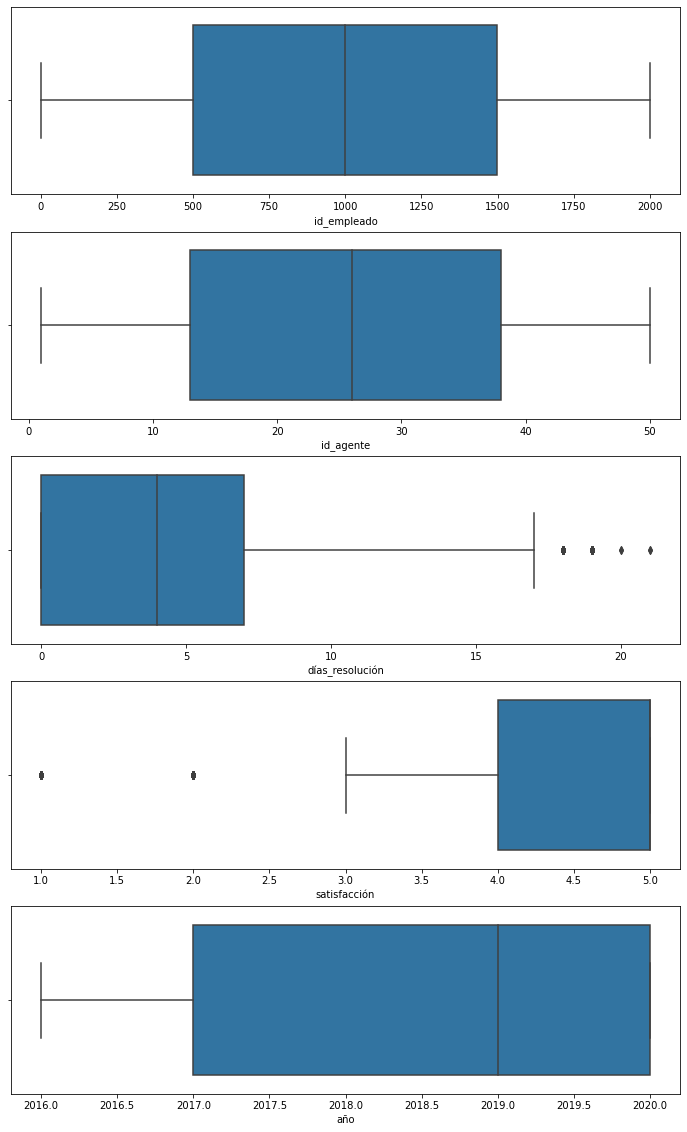

In [31]:
fig, axes = plt.subplots(5, 1, figsize=(12,20))

for i in range(len(numericas.columns)):
    sns.boxplot(x = numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()



📌 Nota Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.




Conclusiones


Si bien es cierto que la lección de hoy ha sido muy teórica, en esta parte los ejercicios no serán tanto de programar sino de pensar 🤔. ¿Qué tendréis que hacer?

En relación a los valores nulos:

> Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).



> Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.


Happy coding 💪🏼

Exploraríamos en qué columnas se encuentran, y dependiendo del recuento de nulos obtenido y del enfoque en el análisis de datos decidiríamos eliminarlos o no. 

Por ejemplo, si vemos que un agente tiene muchos nulos en sus tickets en un mes quizá se deba a razón externa como estar de vacaciones, etc., y necesitaríamos comunicarnos con el departamento de HR para confirmar por qué durante ese mes hubo ese rendimiento de trabajo. 